# Polynomial model implementation

This is continuation of lecture [Polynomial model implementation](http://localhost:8888/notebooks/machine_learning/__linear_regression/__linear_regession_VI.ipynb) and [Metrics: RMSE, MAE, MSE, MAPE, MPE overview](http://localhost:8888/notebooks/machine_learning/__linear_regression/__linear_regression_VIII.ipynb)


In [1]:
%matplotlib inline
#%matplotlib notebook
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_set(size):
    return 6 * np.random.rand(size, 1) - 2

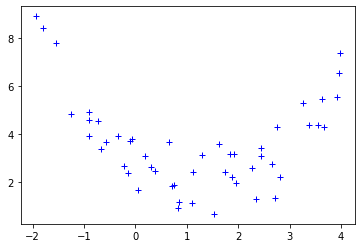

In [3]:
m = 50
x = generate_set(m)
theta = [0.7, 2]
# 1, q, b, q^2, qb, b^2
y = theta[0]*x**2 - theta[1]*x + 3 + np.random.randn(m, 1)

# print(
#     f'x set is: {x}'
# )

plt.plot(x, y, 'b+')
plt.show()

LinearRegression model method <code>**[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit)**</code> and <code>**[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict)**</code>

In [4]:
x

array([[ 0.64736281],
       [ 0.05889845],
       [-0.57285705],
       [ 2.44045673],
       [ 1.87521768],
       [ 2.4380454 ],
       [-0.89629963],
       [-0.06279749],
       [-1.9359773 ],
       [ 0.82163955],
       [ 2.26281972],
       [ 3.9202675 ],
       [ 2.72415272],
       [-0.21511345],
       [ 0.85713051],
       [-1.54591311],
       [ 2.34721057],
       [-0.90884639],
       [ 3.96528318],
       [-0.106069  ],
       [ 0.75025215],
       [-0.90116994],
       [ 3.37833606],
       [-0.14359644],
       [ 1.74176658],
       [ 0.37447957],
       [ 0.29616502],
       [ 3.55908853],
       [ 1.52584703],
       [ 1.30225298],
       [ 2.76374646],
       [-1.24635963],
       [ 1.85152431],
       [ 3.63369221],
       [ 1.11596554],
       [ 2.81428445],
       [-1.80261163],
       [ 0.18903376],
       [ 2.65956116],
       [ 0.72314246],
       [ 3.67217537],
       [ 3.25886508],
       [ 1.10612745],
       [-0.33416914],
       [ 1.96474147],
       [-0

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

RMSE: 1.855
R2:   0.016


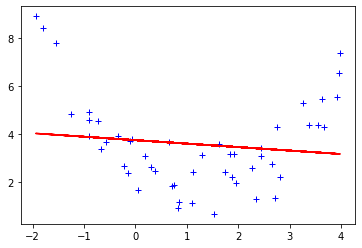

In [6]:
m = LinearRegression()
m.fit(x, y)
y_preds = m.predict(x)

print(
    f'RMSE: {np.sqrt(mean_squared_error(y, y_preds)):.3f}\n' 
    f'R2:   {r2_score(y, y_preds):.3f}'
)

plt.plot(x, y, 'b+')
plt.plot(x, y_preds, 'r-')
plt.show()

In [7]:
x

array([[ 0.64736281],
       [ 0.05889845],
       [-0.57285705],
       [ 2.44045673],
       [ 1.87521768],
       [ 2.4380454 ],
       [-0.89629963],
       [-0.06279749],
       [-1.9359773 ],
       [ 0.82163955],
       [ 2.26281972],
       [ 3.9202675 ],
       [ 2.72415272],
       [-0.21511345],
       [ 0.85713051],
       [-1.54591311],
       [ 2.34721057],
       [-0.90884639],
       [ 3.96528318],
       [-0.106069  ],
       [ 0.75025215],
       [-0.90116994],
       [ 3.37833606],
       [-0.14359644],
       [ 1.74176658],
       [ 0.37447957],
       [ 0.29616502],
       [ 3.55908853],
       [ 1.52584703],
       [ 1.30225298],
       [ 2.76374646],
       [-1.24635963],
       [ 1.85152431],
       [ 3.63369221],
       [ 1.11596554],
       [ 2.81428445],
       [-1.80261163],
       [ 0.18903376],
       [ 2.65956116],
       [ 0.72314246],
       [ 3.67217537],
       [ 3.25886508],
       [ 1.10612745],
       [-0.33416914],
       [ 1.96474147],
       [-0

Lets discuss and implement 
<code>**[PolynomialFeatures()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)**</code> method and 
<code>**[fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform)**</code> method 

PlynomialFeatures method will generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 

In [8]:

A = np.array([
    [2, 4]
])

# PolynomialFeatures default degree 2 
poly = PolynomialFeatures()
B = poly.fit_transform(A)

print(f'features we provide: {A} \n')
print(f'features that we get: {B}')

features we provide: [[2 4]] 

features that we get: [[ 1.  2.  4.  4.  8. 16.]]


features [q, b] of the 2° polynomial features are going to be [1, q, b, q^2, qb, b^2]

In [9]:
poly = PolynomialFeatures(degree=4, interaction_only=True)
C = poly.fit_transform(A)
print(C)

[[1. 2. 4. 8.]]


<code>**include_bias**</code> thats our extra column that corresponds for extra feature x_0 that always take value of 1, recap from lecture [__linear_regession_V - Computing parameters analytically](http://localhost:8888/notebooks/machine_learning/__linear_regression/__linear_regession_V.ipynb)

In [10]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly.fit_transform(A)

array([[2., 4., 8.]])

Some of the attributes we are provided with

In [11]:
poly = PolynomialFeatures()
poly.fit_transform(A)

# print(f'{poly.powers_}\n')
print(f'no of features we gave: {poly.n_input_features_}\n')
print(f'how many features returned: {poly.n_output_features_}')

no of features we gave: 2

how many features returned: 6


RMSE: 0.826
R2:   0.805


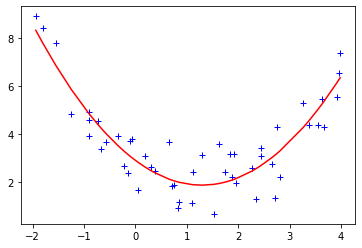

In [12]:
x_polynomial = PolynomialFeatures().fit_transform(x)

# print(
#     f'polynomials: {x_polynomial}\n' 
# )

model = LinearRegression()
model.fit(x_polynomial, y)
    
y_predictions = model.predict(x_polynomial)

print(
    f'RMSE: {np.sqrt(mean_squared_error(y, y_predictions)):.3f}\n' 
    f'R2:   {r2_score(y, y_predictions):.3f}'
)

plt.plot(x, y, 'b+')
plt.plot(sorted(x[:, 0]), y_predictions[np.argsort(x[:, 0])], 'r')
plt.show()

# RMSE: 1.630
# R2:   0.575
    
# RMSE: 0.975
# R2:   0.848

The performance boost is evident in both the performance metrics – <code>**RMSE**</code> has decreased and <code>**R2**</code> score has increased. The same thing is evident in the plot. Let’s take a few higher degree of polynomial features    2, 4, 8, 16, 32

Degree: 2
RMSE:   0.826
R2:     0.805
-------------
Degree: 4
RMSE:   0.789
R2:     0.822
-------------
Degree: 8
RMSE:   0.782
R2:     0.825
-------------
Degree: 16
RMSE:   0.710
R2:     0.856
-------------
Degree: 32
RMSE:   1.091
R2:     0.660
-------------


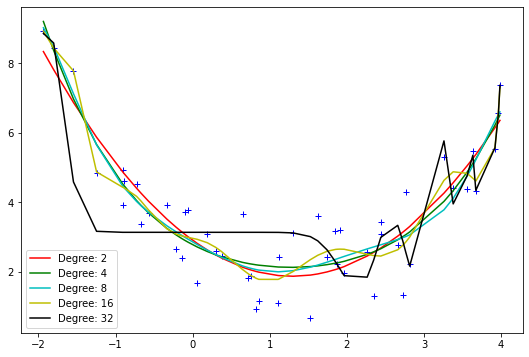

In [13]:
#%matplotlib notebook
def get_preds(x, y, degree):
    poly_feats = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_feats.fit_transform(x)
    lr = LinearRegression()
    lr.fit(x_poly, y)
    return lr.predict(x_poly)

degrees = [2,   4,   8,   16,   32]
cs      = ['r', 'g', 'c', 'y', 'k']

plt.figure(figsize=(9, 6))
plt.plot(x, y, 'b+',)

for degree, c in zip(degrees, cs):
    y_preds = get_preds(x, y, degree)
    plt.plot(sorted(x[:, 0]), y_preds[np.argsort(x[:, 0])], c, label='Degree: {}'.format(degree))
    print(
    f'Degree: {degree}\n' 
    f'RMSE:   {np.sqrt(mean_squared_error(y, y_preds)):.3f}\n' 
    f'R2:     {r2_score(y, y_preds):.3f}'
    '\n''-------------'
)

plt.legend()
plt.show()

Our model complexity was increased by the degree of polynomial features. We went from a bad model of degree 1, which has high bias <code>**underfits**</code>, to quite good model (degree 2) and then to another bad models (degree 16 or 32), which has high variance <code>**overfits**</code>. Thus we hurt performance and we need to make sure that with increased complexity we stays sane levels of performance, refer to <code>**[Big O notion](https://en.wikipedia.org/wiki/Big_O_notation)**</code><br>

To get good generalization capabilities that perform well on unseen data we will work with learning curves to peek into performance metrics.

We can utilitze <code>**[sklearn pipeline module](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)**</code> for <code>**PolynomialFeatures and LinearRegression**</code> to group them into one single entity and perform in conjunction to each other

In [14]:
from sklearn.pipeline import Pipeline

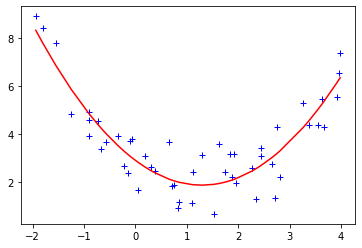

In [15]:
model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

model.fit(x, y)
y_pred = model.predict(x)

plt.plot(x, y, 'b+', )
plt.plot(sorted(x[:, 0]), y_pred[np.argsort(x[:, 0])], 'r')
plt.show()

## Metrics and learning curves

Training and testing(a.k.a validation) loss

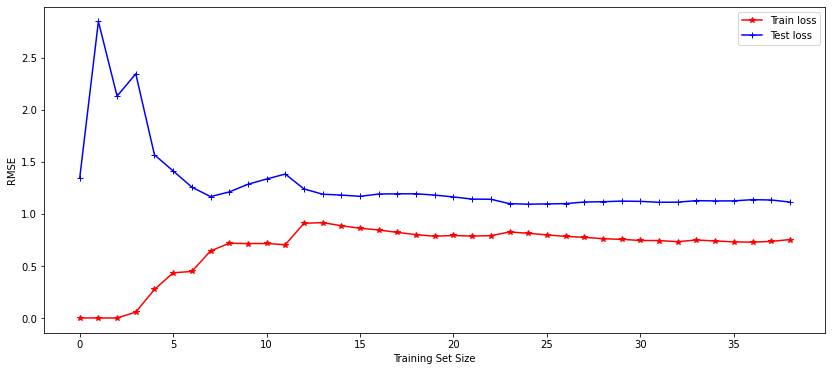

In [16]:
#%matplotlib notebook
%matplotlib inline
def plot_lcs(model, X, Y, val_split=0.2, metrics=mean_squared_error):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=val_split)
    
    # collections of errors:
    train_time_loss, test_time_loss = [], []
    
    # iterating over train size:
    for train_size in range(1, len(x_train)):
        # training
        model.fit(x_train[:train_size], y_train[:train_size])
        
        # train and val predictions
        train_preds = model.predict(x_train[:train_size])
        test_preds = model.predict(x_test)
        
        # metrics calculation
        train_time_loss.append(metrics(y_train[:train_size], train_preds))
        test_time_loss.append(metrics(y_test, test_preds))
        
    # plotting curves
    plt.plot(np.sqrt(train_time_loss), 'r-*', label='Train loss')
    plt.plot(np.sqrt(test_time_loss), 'b-+', label='Test loss')
    plt.ylabel('RMSE')
    plt.xlabel('Training Set Size')

plt.figure(figsize=(14, 6))
plot_lcs(model, x, y)
plt.legend()
plt.show()

Trying it with a model having polynomial features of degree 12 and lets see results.

Gap between <code>**testing loss**</code> curve and the <code>**training loss**</code> curve has increased. Along with this, its noticible that the loss for training set is much more lower than the test(a.k.a validation) set. These two generally are the symptoms of a high variance problem. It  displays that the model is <code>**overfitting the training data**</code> thereby performing poorly on new unseen data.

The main take away question is :
* 1 ) Are  there features in higher degree polynomials that are better describing our predictions than the features used in lower degree polynomials? 

* 2 ) And is there a way to regularize the overfitting aspect of a higher degree polynomial regression? 

## Concept of regularization 

Now the black magic begins :)

In [ ]:
#Regularization L1

# from sklearn import linear_model
# lasso_reg = linear_model.Lasso(alpha=5, max_iter=25, tol=0.05)
# lasso_reg.fit(X_train, y_train)
# accuracy_tr = lasso_reg.score(X_test, y_test)
# accuracy_te = lasso_reg.score(X_train, y_train) 
# # Theta coefficients
# coef  = lasso_reg.coef_ 
# # Interceptor
# print(f'accuracy with tests: {accuracy_tr}')
# print(f'accuracy with train: {accuracy_te}')
# print(f'coef: {coef}') 